# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


In [3]:
processed_df = process_ontime_payments(cleaned_df)
processed_df

,CustomerId,OnTimePayments
0,CustomerId_1001,6
1,CustomerId_1002,22
2,CustomerId_1003,8
3,CustomerId_1005,18
4,CustomerId_1010,12
...,...,...
2633,CustomerId_992,8
2634,CustomerId_993,6
2635,CustomerId_994,1815
2636,CustomerId_996,30


In [4]:
merged_df = pd.merge(processed_df, cleaned_df, on='CustomerId', how='left')
merged_df

,CustomerId,OnTimePayments,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,CustomerId_1001,6,TransactionId_11879,BatchId_61924,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2018-11-16 07:53:19+00:00,2,0
1,CustomerId_1001,6,TransactionId_36212,BatchId_23377,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,10000.0,10000,2018-11-16 08:16:24+00:00,2,0
2,CustomerId_1001,6,TransactionId_64687,BatchId_30141,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-200.0,200,2018-11-16 08:16:36+00:00,2,0
3,CustomerId_1001,6,TransactionId_82586,BatchId_58031,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2018-11-16 08:16:40+00:00,2,0
4,CustomerId_1001,6,TransactionId_84144,BatchId_118083,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,5200.0,5200,2018-11-16 08:20:39+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89151,CustomerId_998,112,TransactionId_20599,BatchId_36853,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2019-02-01 13:29:06+00:00,2,0
89152,CustomerId_998,112,TransactionId_128119,BatchId_134322,AccountId_658,SubscriptionId_3215,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,10000.0,10000,2019-02-05 05:14:25+00:00,2,0
89153,CustomerId_998,112,TransactionId_11160,BatchId_22949,AccountId_658,SubscriptionId_3215,UGX,256,ProviderId_1,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-02-08 16:20:04+00:00,4,0
89154,CustomerId_998,112,TransactionId_8475,BatchId_103189,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2019-02-08 16:21:06+00:00,2,0


processed_df = calculate_credit_utilization_ratio(cleaned_df)

## Extracting RFMS Features

Recency(R): Time since a customer's last purchase or transaction.

Frequency(F): Number of purchases or transactions a customer has made.

Monetary(M): Total amount of money a customer has spent with the business.

Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [5]:
rfms_df = create_rfms_features(merged_df)

In [6]:
rfms_df

,CustomerId,OnTimePayments,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,Value,TransactionStartTime,PricingStrategy,FraudResult,dif,Recency,Frequency,Monetary,StdDev,RFMS_combined
0,CustomerId_1001,6,TransactionId_11879,BatchId_61924,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_5,ProductId_15,...,10000,2018-11-16 07:53:19+00:00,2,0,89 days 02:08:09,89,3,8400.000000,2262.741700,1942.774170
2,CustomerId_1001,6,TransactionId_64687,BatchId_30141,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,200,2018-11-16 08:16:36+00:00,2,0,89 days 01:44:52,89,30892,-898.301421,1845.804866,9308.120202
5,CustomerId_1002,22,TransactionId_75390,BatchId_26788,AccountId_662,SubscriptionId_2325,UGX,256,ProviderId_5,ProductId_1,...,1500,2018-11-15 18:50:09+00:00,4,0,89 days 15:11:19,89,5,900.000000,374.165739,254.516574
16,CustomerId_1003,8,TransactionId_20674,BatchId_23864,AccountId_663,SubscriptionId_3559,UGX,256,ProviderId_5,ProductId_15,...,10000,2019-02-01 14:58:07+00:00,2,0,11 days 19:03:21,11,4,6500.000000,3657.184710,1671.318471
19,CustomerId_1003,8,TransactionId_86446,BatchId_97680,AccountId_4840,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,1000,2019-02-01 14:59:56+00:00,2,0,11 days 19:01:32,11,1734,-1000.000000,0.000000,324.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,CustomerId_992,8,TransactionId_56096,BatchId_65022,AccountId_652,SubscriptionId_2615,UGX,256,ProviderId_5,ProductId_15,...,10000,2019-02-08 10:23:23+00:00,2,0,4 days 23:38:05,4,4,6500.000000,3774.917218,1680.291722
89011,CustomerId_993,6,TransactionId_61647,BatchId_61951,AccountId_653,SubscriptionId_4236,UGX,256,ProviderId_5,ProductId_15,...,10000,2019-01-18 15:51:50+00:00,2,0,25 days 18:09:38,25,3,8666.666667,1885.618083,1932.795142
89016,CustomerId_994,1815,TransactionId_2620,BatchId_123849,AccountId_654,SubscriptionId_2266,UGX,256,ProviderId_6,ProductId_3,...,1000,2018-11-15 18:37:07+00:00,2,0,89 days 15:24:21,89,61,9475.409836,17744.180812,3723.400048
89117,CustomerId_996,30,TransactionId_24910,BatchId_124623,AccountId_656,SubscriptionId_3753,UGX,256,ProviderId_1,ProductId_15,...,10000,2018-12-07 14:37:54+00:00,2,0,67 days 19:23:34,67,15,9666.666667,1247.219129,2089.355246


In [7]:
rfms_df.isna().sum()

CustomerId              0
OnTimePayments          0
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dif                     0
Recency                 0
Frequency               0
Monetary                0
StdDev                  0
RFMS_combined           0
dtype: int64

In [8]:
rfms = ['Recency',	'Frequency',	'Monetary',	'StdDev', 'OnTimePayments']
final_df = rfms_df[rfms]
final_df.head()

,Recency,Frequency,Monetary,StdDev,OnTimePayments
0,89,3,8400.000000,2262.741700,6
2,89,30892,-898.301421,1845.804866,6
5,89,5,900.000000,374.165739,22
16,11,4,6500.000000,3657.184710,8
19,11,1734,-1000.000000,0.000000,8


In [9]:
rfms_df.describe()

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,dif,Recency,Frequency,Monetary,StdDev,RFMS_combined
count,2.643000e+03,2643.0,2643.000000,2643.000000,2643.000000,2643.000000,2643,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,1.747991e+03,256.0,11305.173288,11396.253121,2.458191,0.000378,51 days 05:16:04.877790389,50.653424,33.732879,8028.422108,5366.471458,2172.712801
std,2.660910e+04,0.0,22024.646185,22070.010591,0.962218,0.019451,27 days 11:33:59.532063311,27.514710,603.526240,13488.477948,10770.707564,3538.542470
min,1.000000e+00,256.0,-14500.000000,200.000000,0.000000,0.000000,0 days 02:45:55,0.000000,1.000000,-23945.121951,0.000000,-1946.729647
25%,8.000000e+00,256.0,1500.000000,1500.000000,2.000000,0.000000,26 days 04:38:24.500000,26.000000,3.000000,2100.000000,808.106865,640.360834
50%,3.300000e+01,256.0,10000.000000,10000.000000,2.000000,0.000000,53 days 14:47:09,53.000000,8.000000,5458.333333,2357.022604,1654.581182
75%,1.880000e+02,256.0,10000.000000,10000.000000,4.000000,0.000000,76 days 04:15:05.500000,76.000000,20.000000,8881.948052,4381.273746,2059.841565
max,1.082900e+06,256.0,240000.000000,240000.000000,4.000000,1.000000,90 days 07:42:39,90.000000,30892.000000,167875.000000,141528.012071,44357.779442


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>],
       [<Axes: title={'center': 'OnTimePayments'}>, <Axes: >]],
      dtype=object)

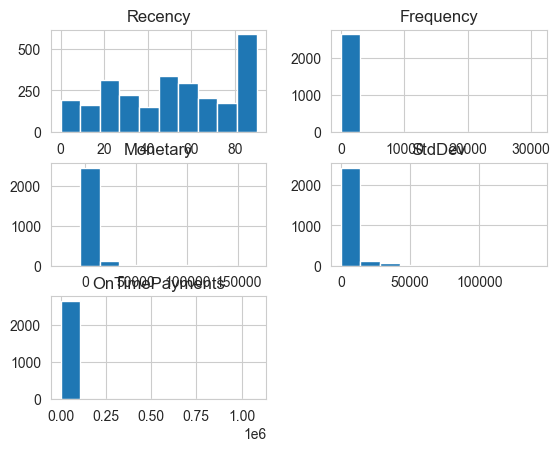

In [10]:
final_df.hist()

## Outliers detection in RFMS features

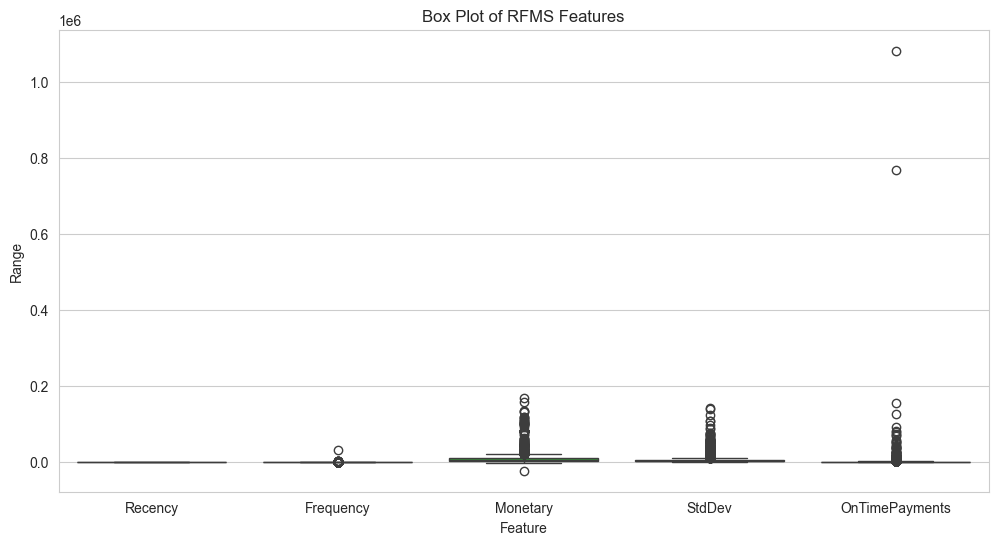

In [11]:
outlier_indices = detect_rfms_outliers(final_df)

## MinMaxScaler Transformation of RFMS Feature

In [12]:
scaled_df = scale_features(final_df)
scaled_df.describe()

,Recency,Frequency,Monetary,StdDev,OnTimePayments
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,0.562816,0.001060,0.166685,0.037918,0.001613
std,0.305719,0.019537,0.070318,0.076103,0.024572
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288889,0.000065,0.135779,0.005710,0.000006
50%,0.588889,0.000227,0.153287,0.016654,0.000030
75%,0.844444,0.000615,0.171135,0.030957,0.000173
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
scaled_df.head()

,Recency,Frequency,Monetary,StdDev,OnTimePayments
0,0.988889,0.000065,0.168622,0.015988,0.000005
1,0.988889,1.000000,0.120148,0.013042,0.000005
2,0.988889,0.000129,0.129523,0.002644,0.000019
3,0.122222,0.000097,0.158717,0.025841,0.000006
4,0.122222,0.056100,0.119618,0.000000,0.000006


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>],
       [<Axes: title={'center': 'OnTimePayments'}>, <Axes: >]],
      dtype=object)

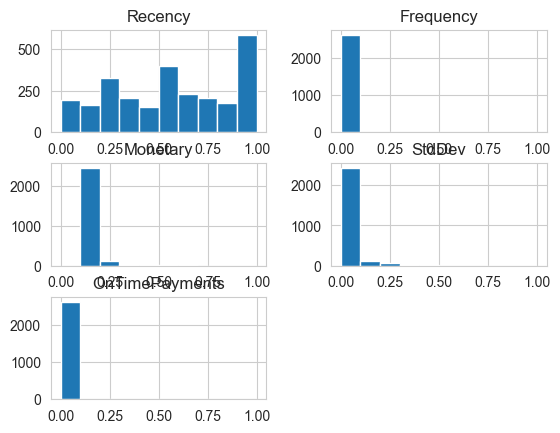

In [14]:
scaled_df.hist()

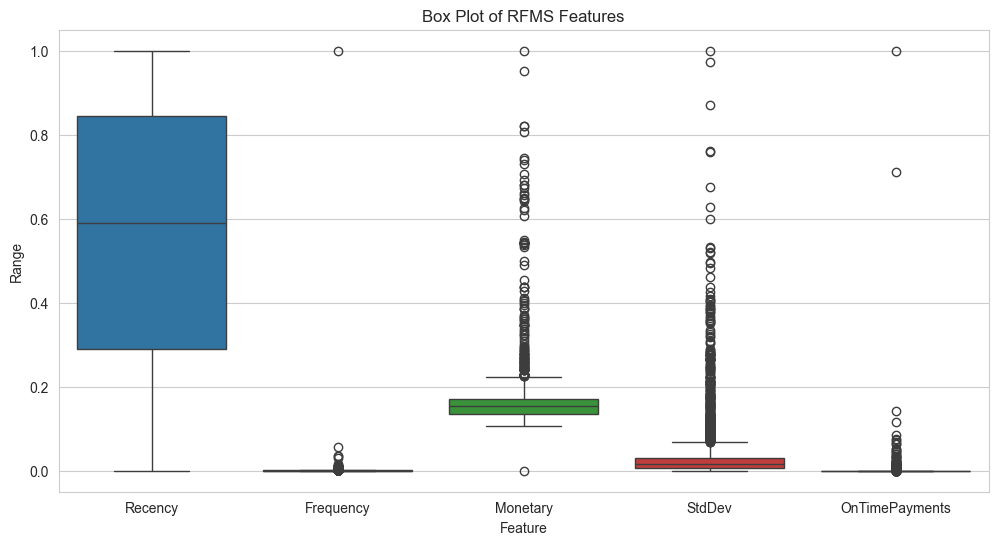

In [15]:
outlier_indices = detect_rfms_outliers(scaled_df)

## Visualizing in RFMS Space

### Comparative Scoring

In [16]:
bn_rfms_df =  assign_comparative_binary_score(scaled_df)
bn_rfms_df

,Recency,Frequency,Monetary,StdDev,OnTimePayments,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,>OnTimePayment_avg
0,0.988889,0.000065,0.168622,0.015988,0.000005,0,0,1,0,0
1,0.988889,1.000000,0.120148,0.013042,0.000005,0,1,0,0,0
2,0.988889,0.000129,0.129523,0.002644,0.000019,0,0,0,0,0
3,0.122222,0.000097,0.158717,0.025841,0.000006,1,0,0,0,0
4,0.122222,0.056100,0.119618,0.000000,0.000006,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2638,0.044444,0.000097,0.158717,0.026673,0.000006,1,0,0,0,0
2639,0.277778,0.000065,0.170012,0.013323,0.000005,1,0,1,0,0
2640,0.988889,0.001942,0.174228,0.125376,0.001675,0,1,1,1,1
2641,0.744444,0.000453,0.175226,0.008813,0.000027,0,0,1,0,0


### User classification

In [17]:
classified_df = apply_classification(bn_rfms_df)
classified_df.head()

,Recency,Frequency,Monetary,StdDev,OnTimePayments,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,>OnTimePayment_avg,Classification,Binary_Classification
0,0.988889,0.000065,0.168622,0.015988,0.000005,0,0,1,0,0,High-risk,1
1,0.988889,1.000000,0.120148,0.013042,0.000005,0,1,0,0,0,High-risk,1
2,0.988889,0.000129,0.129523,0.002644,0.000019,0,0,0,0,0,High-risk,1
3,0.122222,0.000097,0.158717,0.025841,0.000006,1,0,0,0,0,High-risk,1
4,0.122222,0.056100,0.119618,0.000000,0.000006,1,1,0,0,0,Low-risk,0


In [21]:
classified_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'StdDev', 'OnTimePayments',
       '<Recency_avg', '>Frequency_avg', '>Monetary_avg', '>StdDev_avg',
       '>OnTimePayment_avg', 'Classification', 'Binary_Classification',
       'color'],
      dtype='object')

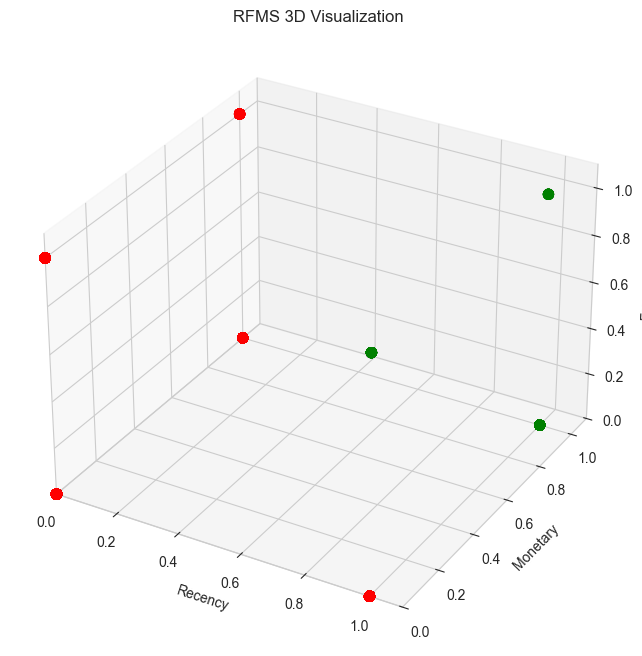

In [19]:
visualize_rfms(classified_df)

## Perform Weight of Evidence (WoE) binning 

In [20]:
# Example usage:
features = ['Recency', 'Frequency', 'Monetary', 'StdDev', '<Recency_avg', '>Frequency_avg', '>Monetary_avg', '>StdDev_avg']
df_woe, woe_dict, iv_dict = woe_binning(classified_df, features, 'Binary_Classification')

NameError: name 'woe_binning' is not defined

In [ ]:
df_woe.head()

## Extract Time Features

In [ ]:
processed_data = extract_time_features(processed_data)
processed_data.head()
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

## Handle Missing Values

In [ ]:
processed_data = handle_missing_values(processed_data)
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
non_fraud_df = processed_data[processed_data['FraudResult'] == 1.0]
print(f"Number of fraudulent transactions: {len(non_fraud_df)}")

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Encode Categorical Variables

In [ ]:
processed_data = encode_categorical_variables(processed_data)
processed_data.info()

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Normalize/Standardize Numerical Features

In [ ]:
processed_data = normalize_and_standardize_numerical_features(processed_data)

In [ ]:
processed_data['FraudResult'].unique()

In [ ]:
processed_data.head()

In [ ]:
processed_data.info()

In [ ]:
processed_data

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Save the the processed dataset

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)